# Прогнозирование оттока клиентов в сети отелей

Заказчик этого исследования — сеть отелей «Как в гостях».
Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменяет бронирование, то компания терпит убытки. Чтобы решить эту проблему, нужно разработать систему, которая предскажет отказ от брони. 

<font color='green'>Цель</font>

Проанализировать изменение прибыли после внедрения системы депозитов. Система депозитов базируется на модели машинного обучения, предсказывающей отмену заказа.  

<font color='green'>Задачи</font>

- исследовать данные;
- рассчитать прибыль до внедрения новой системы;
- построить модель машинного обучения;
- рассчитать прибыль после внедрения новой системы;
- определить портрет потенциального неплательщика.

<font color='green'>Основные условия</font>

- бюджет  - 400 тыс. руб.
- стоимость номера и разового обслуживания:

 * A: 1000 + 400
 * B:  800 + 350 
 * C:  600 + 350 
 * D:  550 + 150 
 * E:  500 + 150 
 * F:  450 + 150 
 * G:  350 + 150 

- ценовая политика: +20% весной и осенью, +40% летом.

<font color='green'>Файлы</font>

- `hotel_train.csv`
- `hotel_test.csv`

<font color='green'>Признаки</font>

-    `id` — номер записи;
-    `adults` — количество взрослых постояльцев;
-    `arrival_date_year` — год заезда;
-    `arrival_date_month` — месяц заезда;
-    `arrival_date_week_number` — неделя заезда;
-    `arrival_date_day_of_month` — день заезда;
-    `babies` — количество младенцев;
-    `booking_changes` — количество изменений параметров заказа;
-    `children` — количество детей от 3 до 14 лет;
-    `country` — гражданство постояльца;
-    `customer_type` — тип заказчика:
    *        `Contract` — договор с юридическим лицом;
    *        `Group` — групповой заезд;
    *        `Transient` — не связано с договором или групповым заездом;
    *        `Transient-party` — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
-    `days_in_waiting_list` — сколько дней заказ ожидал подтверждения;
-    `distribution_channel` — канал дистрибуции заказа;
-    `is_repeated_guest` — признак того, что гость бронирует номер второй раз;
-    `lead_time` — количество дней между датой бронирования и датой прибытия;
-    `meal` — опции заказа:
    *        `SC` — нет дополнительных опций;
    *        `BB` — включён завтрак;
    *        `HB` — включён завтрак и обед;
    *        `FB` — включён завтрак, обед и ужин.
-    `previous_bookings_not_canceled` — количество подтверждённых заказов у клиента;
-    `previous_cancellations` — количество отменённых заказов у клиента;
-    `required_car_parking_spaces` — необходимость места для автомобиля;
-    `reserved_room_type` — тип забронированной комнаты;
-    `stays_in_weekend_nights` — количество ночей в выходные дни;
-    `stays_in_week_nights` — количество ночей в будние дни;
-    `total_nights` — общее количество ночей;
-    `total_of_special_requests` — количество специальных отметок.

<font color='green'>Целевой признак</font>

- `is_canceled` — отмена заказа.

<font color='green'>Содержание</font>

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузка-и-подготовка-данных" data-toc-modified-id="Шаг-1.-Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузка и подготовка данных</a></span></li><li><span><a href="#Шаг-2.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг-2.-Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Исследовательский анализ данных</a></span></li><li><span><a href="#Шаг-3.-Вычисление-бизнес-метрики" data-toc-modified-id="Шаг-3.-Вычисление-бизнес-метрики-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Вычисление бизнес-метрики</a></span></li><li><span><a href="#Шаг-4.-Подготовка-данных-для-ML" data-toc-modified-id="Шаг-4.-Подготовка-данных-для-ML-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Подготовка данных для ML</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Шаг-5.-Разработка-модели-ML" data-toc-modified-id="Шаг-5.-Разработка-модели-ML-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Разработка модели ML</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span><ul class="toc-item"><li><span><a href="#Подбор-параметров-без-устранения-дисбаланса" data-toc-modified-id="Подбор-параметров-без-устранения-дисбаланса-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Подбор параметров без устранения дисбаланса</a></span></li><li><span><a href="#Подбор-параметров-с-устранением-дисбаланса" data-toc-modified-id="Подбор-параметров-с-устранением-дисбаланса-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Подбор параметров с устранением дисбаланса</a></span></li></ul></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Решающее дерево</a></span><ul class="toc-item"><li><span><a href="#Подбор-параметров-без-устранения-дисбаланса" data-toc-modified-id="Подбор-параметров-без-устранения-дисбаланса-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Подбор параметров без устранения дисбаланса</a></span></li><li><span><a href="#Подбор-параметров-с-устранением-дисбаланса" data-toc-modified-id="Подбор-параметров-с-устранением-дисбаланса-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Подбор параметров с устранением дисбаланса</a></span></li></ul></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Случайный лес</a></span><ul class="toc-item"><li><span><a href="#Подбор-параметров-без-устранения-дисбаланса" data-toc-modified-id="Подбор-параметров-без-устранения-дисбаланса-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Подбор параметров без устранения дисбаланса</a></span></li><li><span><a href="#Подбор-параметров-с-устранением-дисбаланса" data-toc-modified-id="Подбор-параметров-с-устранением-дисбаланса-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Подбор параметров с устранением дисбаланса</a></span></li></ul></li></ul></li><li><span><a href="#Шаг-6.-Результаты-внедрения-модели" data-toc-modified-id="Шаг-6.-Результаты-внедрения-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг 6. Результаты внедрения модели</a></span></li></ul></div>

### Шаг 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState

from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix
from sklearn.utils import shuffle

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

import datetime
from datetime import timedelta

from dateutil.relativedelta import relativedelta, FR, TU
from dateutil.easter import easter
from dateutil.parser import parse
from dateutil import rrule


import sweetviz as sv # для EDA


import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv('/ML/datasets/hotel_train.csv')
data_test = pd.read_csv('/ML/datasets/hotel_test.csv')
df = pd.concat([data_train, data_test], ignore_index=False)

In [3]:
print(data_train.shape, data_test.shape, df.shape)

(65229, 25) (32412, 25) (97641, 25)


In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0,1,2,3,4,5,6,7,8,9
is_canceled,0,0,0,0,1,1,1,0,0,0
lead_time,7.0,14.0,0.0,9.0,85.0,75.0,23.0,18.0,68.0,37.0
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0
stays_in_week_nights,1,2,2,2,3,3,4,4,4,4
adults,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97641 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              97641 non-null  int64  
 1   is_canceled                     97641 non-null  int64  
 2   lead_time                       97641 non-null  float64
 3   arrival_date_year               97641 non-null  int64  
 4   arrival_date_month              97641 non-null  object 
 5   arrival_date_week_number        97641 non-null  int64  
 6   arrival_date_day_of_month       97641 non-null  int64  
 7   stays_in_weekend_nights         97641 non-null  int64  
 8   stays_in_week_nights            97641 non-null  int64  
 9   adults                          97641 non-null  float64
 10  children                        97641 non-null  float64
 11  babies                          97641 non-null  float64
 12  meal                            

Посмотрим за какие периоды есть данные.

In [6]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [7]:
print(df.loc[df['arrival_date_year'] == 2015]['arrival_date_month'].unique())
print(df.loc[df['arrival_date_year'] == 2016]['arrival_date_month'].unique())
print(df.loc[df['arrival_date_year'] == 2017]['arrival_date_month'].unique())

['July' 'August' 'September' 'October' 'November' 'December']
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Заменим названия месяцев на числовые.

In [8]:
months =  {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, \
               "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}
df= df.replace(months)

Уберем пробелы из названий категорий.

In [9]:
df['reserved_room_type'] = df['reserved_room_type'].str.strip()
df['meal'] = df['meal'].str.strip()

Прибыль будем считать на основе файла `hotel_test.csv`. Сформируем отдельный файл с нужными нам данными.

In [10]:
data = df[['is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', \
                 'reserved_room_type', 'total_nights']][65229:]
data.shape

(32412, 6)

Сформируем отдельные файлы для обучения и проверки модели, удалив ряд ненужных и коррелирующих друг с другом признаков.  Преобразуем категориальные признаки методом One-Hot Encoding.


- `'id'` - корреляция с целевым признаком есть, но это скорее утечка данных. Зависимости от этого параметра быть не должно.
- признаки `'arrival_date_year'`, `'arrival_date_month'`, `'arrival_date_day_of_month'`, `'arrival_date_week_number'` скоррелированы между собой, поэтому оставляем только один - `'arrival_date_month'`, он покажет сезонность если таковая имеется.
- признаки `'stays_in_week_nights'` и  `'stays_in_weekend_nights'` скоррелированы между собой, поэтому оставляем только один из них.
- в столбце `'country'` признаки сильно несбалансированы, 44% клиентов из страны 'PRT' что очень сильно повлияет на построение модели ML.   

In [11]:
df = df.drop(['id', 'arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_week_number', 'stays_in_week_nights', 'country'], axis=1)

In [12]:
df = pd.get_dummies(df, drop_first=True)

**Вывод**

Прибыль: принято решение рассчитывать прибыль на основе тренировочного датасета, включающего в себя данные за 8 месяцев 2017 года.

Обучение модели: принято решение не использовать даные из столбцов: `'id'`, `'arrival_date_year'`, `'arrival_date_day_of_month'`, `'arrival_date_week_number'`, `'stays_in_week_nights'`, `'country'`.

### Шаг 2. Исследовательский анализ данных

Сформируем отчет для исследовательского анализа данных. Тестовые данные трогать не будем.

In [13]:
report = sv.analyze(data_train)
#report.show_notebook()
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Наблюдается дисбаланс классов. Пропуски и полные дубликаты не выявлены. Проверим наличие дубликатов без данных столбца `'id'`.

In [14]:
data_train.drop(['id'], axis=1).duplicated().sum() 

21377

Дубликаты есть, но мы не можем гарантировать что это дубликаты а не совпадения. Оставим данные без изменения.

Посмотрим на корреляции:

In [15]:
data_train.corrwith(data_train['is_canceled']).sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.328142
previous_cancellations            0.153023
days_in_waiting_list              0.075848
adults                            0.045153
arrival_date_week_number          0.012869
stays_in_week_nights              0.010650
total_nights                      0.001542
arrival_date_day_of_month        -0.001903
stays_in_weekend_nights          -0.013767
children                         -0.017746
babies                           -0.029589
arrival_date_year                -0.030835
is_repeated_guest                -0.040242
previous_bookings_not_canceled   -0.045557
booking_changes                  -0.142935
required_car_parking_spaces      -0.186486
id                               -0.241910
total_of_special_requests        -0.257061
dtype: float64

Интересно, что присутствует отрицательная корреляция с данными `'id'`, возможно это как-то связано с правилами присвоения уникального номера.

**Вывод**

Пропуски и дубликаты не выявлены. Данные представлены за период июль 2015 - август 2017 года. Наблюдается дисбаланс классов: 63% - заказ оплачен, 37% - заказ отменен.

### Шаг 3. Вычисление бизнес-метрики

Создадим столбцы с датой прибытия и отъезда.

In [16]:
data['arrival_date'] = data['arrival_date_year'].astype(str) + data['arrival_date_month'].astype(str).str.zfill(2) \
                       + data['arrival_date_day_of_month'].astype(str).str.zfill(2)
data['arrival_date'] = data['arrival_date'].apply(lambda row: (pd.to_datetime(row, format='%Y%m%d')).date())
data['leave_date'] = data.apply(lambda row: row["arrival_date"] + timedelta(row["total_nights"] - 1), axis=1)

Добавим данные о сезоне (согласно принятому в России понятию).

In [17]:
def season(row):
     
    """
    1 - spring
    2 - summer
    3 - autumn
    4 - winter.
    """
    if row in [3, 4, 5]:
        return 1
    elif row in [6, 7, 8]:
        return 2
    elif row in [9, 10, 11]:
        return 3
    elif row in [12, 1, 2]:
        return 4
    else:
        return None
func = np.vectorize(season)  

data['season'] = func(data["arrival_date_month"]) 

In [18]:
data.sample(n=5, random_state=11)

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,reserved_room_type,total_nights,arrival_date,leave_date,season
16004,1,2017,6,29,A,3,2017-06-29,2017-07-01,2
22181,0,2017,3,17,D,2,2017-03-17,2017-03-18,1
4230,0,2017,3,2,A,4,2017-03-02,2017-03-05,1
22816,0,2017,3,24,A,4,2017-03-24,2017-03-27,1
30280,0,2017,7,21,A,4,2017-07-21,2017-07-24,2


Создадим функцию для разделения дней пребывания по сезонам.

In [19]:
def last_day_month(day):
    next_month = day.replace(day=28) + datetime.timedelta(days=4)  
    return next_month - datetime.timedelta(days=next_month.day)

def payment_for_room(begin,end):
    
    result = []
    while True:
        if begin.month == 12:
            next_month = begin.replace(year=begin.year+1,month=1, day=1)
        else:
            next_month = begin.replace(month=begin.month+1, day=1)
        if next_month > end:
            break
        result.append ([begin,last_day_month(begin)])
        begin = next_month
    
    result.append([begin,end])
    result = pd.DataFrame(result)
    result[0] = pd.to_datetime(result[0], format='%Y-%m-%d')
    result[1] = pd.to_datetime(result[1], format='%Y-%m-%d')
    result['arrival_date_month'] = result.apply(lambda row: row[0].month, axis=1)   
    result['season'] = func(result['arrival_date_month'])  
    result['0'] = (result[1] - result[0]).dt.days +1
    result = result.pivot_table(index=['season'],values='0', aggfunc='sum').T.rename_axis(None, axis=1)\
                   .reset_index(drop=True)
    result = result.astype('int16') 
    return result 

In [20]:
%%time

seasons = pd.DataFrame(columns = [1, 2, 3, 4])
for i in range(len(data)):
    seasons = pd.concat([seasons, payment_for_room(data['arrival_date'][i], data['leave_date'][i])], axis=0, \
                        ignore_index=True)
    
seasons = seasons.fillna(0)

data = data.join(seasons)

CPU times: total: 3min 40s
Wall time: 3min 40s


Добавим данные по уборке. Логика следующая: уборка номера каждые 2 дня + перед приездом постояльца.

In [21]:
data['count_cleaning'] = np.where(data['total_nights']<3, 1, np.floor((data['total_nights'] -1)/2 +1))
data.sample(n=10, random_state=11).T

,16004,22181,4230,22816,30280,43,5792,3105,15887,7597
is_canceled,1,0,0,0,0,1,0,0,1,0
arrival_date_year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,6,3,3,3,7,1,5,1,6,8
arrival_date_day_of_month,29,17,2,24,21,11,12,24,27,30
reserved_room_type,A,D,A,A,A,E,C,A,A,A
total_nights,3,2,4,4,4,2,1,1,7,3
arrival_date,2017-06-29,2017-03-17,2017-03-02,2017-03-24,2017-07-21,2017-01-11,2017-05-12,2017-01-24,2017-06-27,2017-08-30
leave_date,2017-07-01,2017-03-18,2017-03-05,2017-03-27,2017-07-24,2017-01-12,2017-05-12,2017-01-24,2017-07-03,2017-09-01
season,2,1,1,1,2,4,1,4,2,2
1,0,2,4,4,0,0,1,0,0,0


Создадим константы для расчета прибыли.

In [22]:
ROOM_COST_A = 1000
CLEANING_COST_A = 400

ROOM_COST_B = 800
CLEANING_COST_B = 350

ROOM_COST_C = 600
CLEANING_COST_C = 350

ROOM_COST_D = 550
CLEANING_COST_D = 150

ROOM_COST_E = 500
CLEANING_COST_E = 150

ROOM_COST_F = 450
CLEANING_COST_F = 150

ROOM_COST_G = 350
CLEANING_COST_G = 150

SPRING_RATIO = 1.2
SUMMER_RATIO = 1.4
AUTUMN_RATIO = 1.2
WINTER_RATIO = 1.0

Рассчитаем прибыль. Издержки на обслуживание считаем независимыми от сезона.

In [23]:
data['profit'] = data['is_canceled']

for i in range(len(data)):

    if data['reserved_room_type'][i] == 'A':
        room_cost = ROOM_COST_A
        cleaning_cost = CLEANING_COST_A
    elif data['reserved_room_type'][i] == 'B':
        room_cost = ROOM_COST_B
        cleaning_cost = CLEANING_COST_B
    elif data['reserved_room_type'][i] == 'C':
        room_cost = ROOM_COST_C
        cleaning_cost = CLEANING_COST_C
    elif data['reserved_room_type'][i] == 'D':
        room_cost = ROOM_COST_D
        cleaning_cost = CLEANING_COST_D    
    elif data['reserved_room_type'][i] == 'E':
        room_cost = ROOM_COST_E
        cleaning_cost = CLEANING_COST_E
    elif data['reserved_room_type'][i] == 'F':
        room_cost = ROOM_COST_F
        cleaning_cost = CLEANING_COST_F
    elif data['reserved_room_type'][i] == 'G':
        room_cost = ROOM_COST_G
        cleaning_cost = CLEANING_COST_G    
    else:
        room_cost = None
        cleaning_cost = None    
        
    # подсчет прибыли
    
    if data['is_canceled'][i] == 1:
        data['profit'][i] = -cleaning_cost
    elif data['is_canceled'][i] == 0:
        data['profit'][i] = room_cost * ((data[1][i]*SPRING_RATIO + data[2][i]*SUMMER_RATIO + data[3][i]*AUTUMN_RATIO \
                            + data[4][i]*WINTER_RATIO)) - cleaning_cost * data['count_cleaning'][i] 

In [24]:
data.sample(n=10, random_state=11).T

,16004,22181,4230,22816,30280,43,5792,3105,15887,7597
is_canceled,1,0,0,0,0,1,0,0,1,0
arrival_date_year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,6,3,3,3,7,1,5,1,6,8
arrival_date_day_of_month,29,17,2,24,21,11,12,24,27,30
reserved_room_type,A,D,A,A,A,E,C,A,A,A
total_nights,3,2,4,4,4,2,1,1,7,3
arrival_date,2017-06-29,2017-03-17,2017-03-02,2017-03-24,2017-07-21,2017-01-11,2017-05-12,2017-01-24,2017-06-27,2017-08-30
leave_date,2017-07-01,2017-03-18,2017-03-05,2017-03-27,2017-07-24,2017-01-12,2017-05-12,2017-01-24,2017-07-03,2017-09-01
season,2,1,1,1,2,4,1,4,2,2
1,0,2,4,4,0,0,1,0,0,0


Прибыль за 8 месяцев 2017 года без внедрения системы прогнозирования (млн. руб):

In [25]:
(data['profit'].sum()/1000000).round(2)

49.1

**Вывод**

Применено деление на сезоны согласно принятой в России практике. Стоимость обслуживания номера считается независимой от сезона.

Прибыль за 8 месяцев 2017 г. до внедрения модели составила: 49.1 млн.руб.

### Шаг 4. Подготовка данных для ML

Основной метрикой будем считать `'f1'`меру, в качестве дополнительной - `'recall'`.

#### Разделение данных на выборки

Выделим признаки и целевой признак. 

In [26]:
features = df.drop(['is_canceled'], axis=1)
target = df['is_canceled']

Разделим данные на выборки.

In [27]:
features_test, target_test = features[len(data_train):], target[len(data_train):]

features_train = features[:len(data_train)]
target_train = target[:len(data_train)]

Проверим размеры полученных файлов.

In [28]:
print(features_train.shape, target_train.shape, features_test.shape, target_test.shape)

(65229, 29) (65229,) (32412, 29) (32412,)


#### Масштабирование признаков

Приведем признаки в столбцах к единому масштабу.

In [29]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test) 

### Шаг 5. Разработка модели ML

Cоздадим функции для отображения Матрицы ошибок, вывода основных метрик и сохранения результатов работы моделей:

In [30]:
def matrix_conf(target, predictions):
    matrix = confusion_matrix(target, predictions)
    plt.figure(figsize=(4, 3))
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax); 
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

def mean_test_scorer(grid_search):
    results = pd.DataFrame(grid_search.cv_results_)
    results = results[['mean_test_f1', 'mean_test_precision', 'mean_test_recall', 'mean_test_accuracy']]\
                        .round(3).sort_values(by='mean_test_f1', ascending=False)
    results.columns = ['f1', 'precision', 'recall', 'accuracy']
    return results

def model_result(model, results):    
    scorers = pd.DataFrame(results.iloc[0])
    scorers.columns = [model]
    return scorers


scorers_result = pd.DataFrame() #датафрейм для хранения результатов работы моделей

#### Логистическая регрессия

##### Подбор параметров без устранения дисбаланса

In [31]:
%%time

param_grid = {'class_weight': [None, 'balanced']}

scorers = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
} 

model_logistic_regression = LogisticRegression(random_state=12345)
grid_search_logistic_regression_disbalance = GridSearchCV(model_logistic_regression, param_grid, cv=5, scoring=scorers, refit='f1')
grid_search_logistic_regression_disbalance.fit(features_train, target_train)
predictions_train = grid_search_logistic_regression_disbalance.best_estimator_.predict(features_train)


print("f1: {:.3f}".format(grid_search_logistic_regression_disbalance.best_score_))
print("Параметры лучшей модели:", grid_search_logistic_regression_disbalance.best_params_)

f1: 0.563
Параметры лучшей модели: {'class_weight': 'balanced'}
CPU times: total: 2.59 s
Wall time: 2.58 s


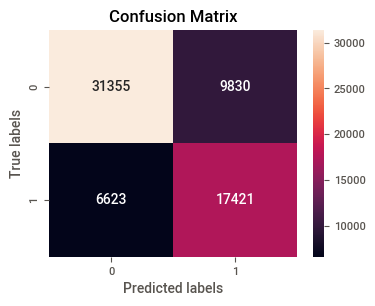

In [32]:
matrix_conf(target_train, predictions_train)

Модель сделала 16 453 ошибки. Класс "0" прогнозируется хуже класса "1".

In [33]:
#сохранение результатов
results = mean_test_scorer(grid_search_logistic_regression_disbalance)
scorers_result = model_result('log_reg_disbalance', results).join(scorers_result)

##### Подбор параметров с устранением дисбаланса

Для устранения дисбаланса воспользуемся методами библиотеки `imblearn`.

In [34]:
%%time

param_grid = {'logisticregression__class_weight': [None, 'balanced']}

scorers = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score)
           
} 

imb_pipeline = make_pipeline(SMOTE(random_state=42), LogisticRegression(random_state=12345))
grid_search_logistic_regression_balance = GridSearchCV(imb_pipeline, param_grid, cv=5, scoring=scorers, refit='f1')
grid_search_logistic_regression_balance.fit(features_train, target_train)
predictions_train = grid_search_logistic_regression_balance.best_estimator_.predict(features_train)


print("f1: {:.3f}".format(grid_search_logistic_regression_balance.best_score_)) 
print("Параметры лучшей модели:", grid_search_logistic_regression_balance.best_params_)            

f1: 0.562
Параметры лучшей модели: {'logisticregression__class_weight': None}
CPU times: total: 52.4 s
Wall time: 7.52 s


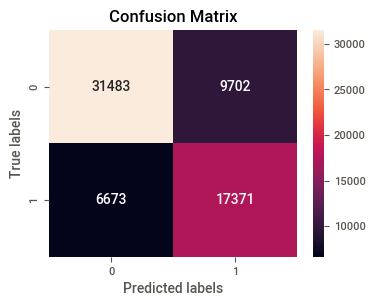

In [35]:
matrix_conf(target_train, predictions_train)

Модель сделала 16 376 ошибок. Класс "0" прогнозируется хуже класса "1". 

In [36]:
#сохранение результатов
results = mean_test_scorer(grid_search_logistic_regression_balance)
scorers_result = model_result('log_reg_balance', results).join(scorers_result) #сохранение результатов

#### Решающее дерево

##### Подбор параметров без устранения дисбаланса

In [37]:
%%time

param_grid = {'max_depth': range (4,10,2),
              'min_samples_leaf': range (3,10),
              'class_weight': [None, 'balanced']
}

scorers = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score)           
} 

model_decision_tree = DecisionTreeClassifier(random_state=12345)
grid_search_decision_tree_disbalance = GridSearchCV(model_decision_tree, param_grid, cv=3, scoring=scorers, refit='f1')
grid_search_decision_tree_disbalance.fit(features_train, target_train)
predictions_train = grid_search_decision_tree_disbalance.best_estimator_.predict(features_train)


print("f1: {:.3f}".format(grid_search_decision_tree_disbalance.best_score_)) 
print("Параметры лучшей модели:", grid_search_decision_tree_disbalance.best_params_)

f1: 0.633
Параметры лучшей модели: {'class_weight': None, 'max_depth': 4, 'min_samples_leaf': 8}
CPU times: total: 11.4 s
Wall time: 11.4 s


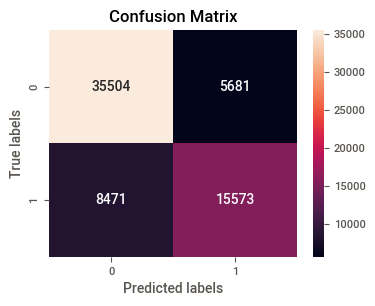

In [38]:
matrix_conf(target_train, predictions_train)

Модель сделала 14 152 ошибки. Класс "1" прогнозируется хуже класса "0".

In [39]:
#сохранение результатов
results = mean_test_scorer(grid_search_decision_tree_disbalance)
scorers_result = model_result('dec_tree_disbalance', results).join(scorers_result)

##### Подбор параметров с устранением дисбаланса

In [40]:
%%time

param_grid = {'decisiontreeclassifier__max_depth': range (4,10,2),
              'decisiontreeclassifier__min_samples_leaf': range (3,10),
              'decisiontreeclassifier__class_weight': [None, 'balanced']
}

scorers = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score)
} 

imb_pipeline = make_pipeline(SMOTE(random_state=42), DecisionTreeClassifier(random_state=12345))
grid_search_decision_tree_balance = GridSearchCV(imb_pipeline, param_grid, cv=3, scoring=scorers, refit='f1')
grid_search_decision_tree_balance.fit(features_train, target_train)
predictions_train = grid_search_decision_tree_balance.best_estimator_.predict(features_train)


print("f1: {:.3f}".format(grid_search_decision_tree_balance.best_score_)) 
print("Параметры лучшей модели:", grid_search_decision_tree_balance.best_params_)            

f1: 0.563
Параметры лучшей модели: {'decisiontreeclassifier__class_weight': None, 'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__min_samples_leaf': 8}
CPU times: total: 8min 53s
Wall time: 52.4 s


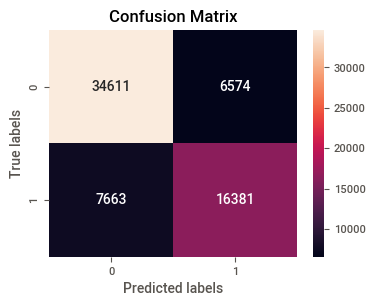

In [41]:
matrix_conf(target_train, predictions_train)

Модель сделала 14 237 ошибок. Класс "1" прогнозируется хуже класса "0". 

In [42]:
#сохранение результатов
results = mean_test_scorer(grid_search_decision_tree_balance)
scorers_result = model_result('dec_tree_balance', results).join(scorers_result) 

#### Случайный лес

##### Подбор параметров без устранения дисбаланса

In [43]:
%%time

param_grid = {'n_estimators': range (1,100,10),
              'max_depth': range (4,10,2),
              'class_weight': [None, 'balanced']
}
scorers = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score)
} 

model_random_forest = RandomForestClassifier(random_state=12345)
grid_search_random_forest_disbalance = RandomizedSearchCV(model_random_forest, param_grid, cv=3, scoring=scorers, \
                                               refit='f1', random_state=12345)
grid_search_random_forest_disbalance.fit(features_train, target_train)
predictions_train = grid_search_random_forest_disbalance.best_estimator_.predict(features_train)


print("f1: {:.3f}".format(grid_search_random_forest_disbalance.best_score_)) 
print("Параметры лучшей модели:", grid_search_random_forest_disbalance.best_params_)

f1: 0.581
Параметры лучшей модели: {'n_estimators': 51, 'max_depth': 4, 'class_weight': 'balanced'}
CPU times: total: 15.1 s
Wall time: 15.1 s


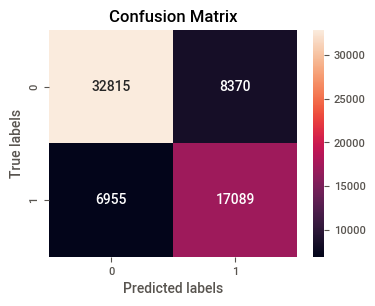

In [44]:
matrix_conf(target_train, predictions_train)

Модель сделала 15 325 ошибок. Класс "0" прогнозируется хуже класса "0". 

In [45]:
#сохранение результатов
results = mean_test_scorer(grid_search_random_forest_disbalance)
scorers_result = model_result('rand_forest_disbalance', results).join(scorers_result)

##### Подбор параметров с устранением дисбаланса

In [46]:
%%time

param_grid = {'randomforestclassifier__n_estimators': range (1,100,10),
              'randomforestclassifier__max_depth': range (4,10,2),
              'randomforestclassifier__class_weight': [None, 'balanced']
}

scorers = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score)
} 

imb_pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(random_state=12345))
grid_search_random_forest_balance = GridSearchCV(imb_pipeline, param_grid, cv=3, scoring=scorers, refit='f1')
grid_search_random_forest_balance.fit(features_train, target_train)
predictions_train = grid_search_random_forest_balance.best_estimator_.predict(features_train)


print("f1: {:.3f}".format(grid_search_random_forest_balance.best_score_)) 
print("Параметры лучшей модели:", grid_search_random_forest_balance.best_params_)            

f1: 0.595
Параметры лучшей модели: {'randomforestclassifier__class_weight': None, 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 91}
CPU times: total: 14min 41s
Wall time: 3min 22s


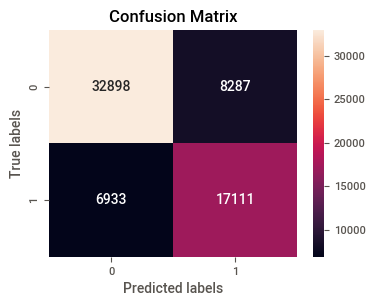

In [47]:
matrix_conf(target_train, predictions_train)

Модель сделала 11 406 ошибок. Класс "1" прогнозируется намного хуже чем класс "0".

In [48]:
#сохранение результатов
results = mean_test_scorer(grid_search_random_forest_balance)
scorers_result = model_result('rand_forest_balance', results).join(scorers_result) 

**Вывод**

При условии максимизации метрики `f1`, результаты работы лучших моделей на тренировочной выборке выглядят следующим образом:

In [49]:
scorers_result

,rand_forest_balance,rand_forest_disbalance,dec_tree_balance,dec_tree_disbalance,log_reg_balance,log_reg_disbalance
f1,0.595,0.581,0.563,0.633,0.562,0.563
precision,0.608,0.565,0.540,0.694,0.547,0.547
recall,0.629,0.649,0.618,0.625,0.615,0.617
accuracy,0.703,0.675,0.654,0.751,0.664,0.664


### Шаг 6. Результаты внедрения модели

Принято решение использовать модель `'dec_tree_disbalance'`. Посмотрим на ее результаты на валидационной и тестовой выборке.

In [50]:
predictions_test = grid_search_decision_tree_disbalance.predict(features_test)

print("f1 на тестовой выборке: {:.3f}".format(f1_score(target_test, predictions_test)))

f1 на тестовой выборке: 0.617


Проверим нашу модель на адекватность, сравнив с исскуственной моделью:

In [51]:
strategies = ['most_frequent', 'uniform']

for strategy in strategies:

    baseline_model = DummyClassifier(strategy = strategy, random_state = 12345)
    baseline_model.fit(features_train, target_train)

    predicted_train = baseline_model.predict(features_train)
    predicted_test = baseline_model.predict(features_test)
    
    print('Стратегия модели:', strategy)
    print("f1 на тестовой выборке: {:.3f}".format(f1_score(target_test, predicted_test)))

Стратегия модели: most_frequent
f1 на тестовой выборке: 0.000
Стратегия модели: uniform
f1 на тестовой выборке: 0.441


Проверку на адекватность наша модель прошла. 

Посчитаем прибыль за 8 месяцев 2017 года после внедрения модели. 

Входные условия: депозит 80% от стоимости номера и единоразового обслуживания.

In [52]:
predictions_test = pd.DataFrame(predictions_test, columns=['is_canceled_ml'])
data['is_canceled_ml'] = predictions_test['is_canceled_ml']

In [53]:
data['deposit'] = data['is_canceled']

for i in range(len(data)):

    if data['reserved_room_type'][i] == 'A':
        room_cost = ROOM_COST_A
        cleaning_cost = CLEANING_COST_A
    elif data['reserved_room_type'][i] == 'B':
        room_cost = ROOM_COST_B
        cleaning_cost = CLEANING_COST_B
    elif data['reserved_room_type'][i] == 'C':
        room_cost = ROOM_COST_C
        cleaning_cost = CLEANING_COST_C
    elif data['reserved_room_type'][i] == 'D':
        room_cost = ROOM_COST_D
        cleaning_cost = CLEANING_COST_D    
    elif data['reserved_room_type'][i] == 'E':
        room_cost = ROOM_COST_E
        cleaning_cost = CLEANING_COST_E
    elif data['reserved_room_type'][i] == 'F':
        room_cost = ROOM_COST_F
        cleaning_cost = CLEANING_COST_F
    elif data['reserved_room_type'][i] == 'G':
        room_cost = ROOM_COST_G
        cleaning_cost = CLEANING_COST_G    
    else:
        room_cost = None
        cleaning_cost = None    
        
    if data['season'][i] == 1:
        ratio = SPRING_RATIO
    elif data['season'][i] == 2: 
        ratio = SUMMER_RATIO
    elif data['season'][i] == 3: 
        ratio = AUTUMN_RATIO
    elif data['season'][i] == 4: 
        ratio = WINTER_RATIO
    else:
        ratio = None

    # подсчет депозита
     
    if data['is_canceled_ml'][i] == 1 and data['is_canceled'][i] == 1:
        data['deposit'][i] = 0.8 *(room_cost * ratio + cleaning_cost)
    else: 
        data['deposit'][i] = 0

In [54]:
print('Прибыль за 8 месяцев 2017 года без внедрения системы прогнозирования (млн. руб): {:.2f}'\
      .format(data['profit'].sum()/1000000))
print('Прибыль за 8 месяцев 2017 года после внедрения системы прогнозирования (млн. руб): {:.2f}'\
      .format(data['profit'].sum()/1000000 + (data['deposit'].sum())/1000000))

Прибыль за 8 месяцев 2017 года без внедрения системы прогнозирования (млн. руб): 49.10
Прибыль за 8 месяцев 2017 года после внедрения системы прогнозирования (млн. руб): 57.54


Внедрение модели окупилось.

Визуализируем значимость признаков нашей модели и посмотрим на данные в разрезе отмены/подтверждения заказа.

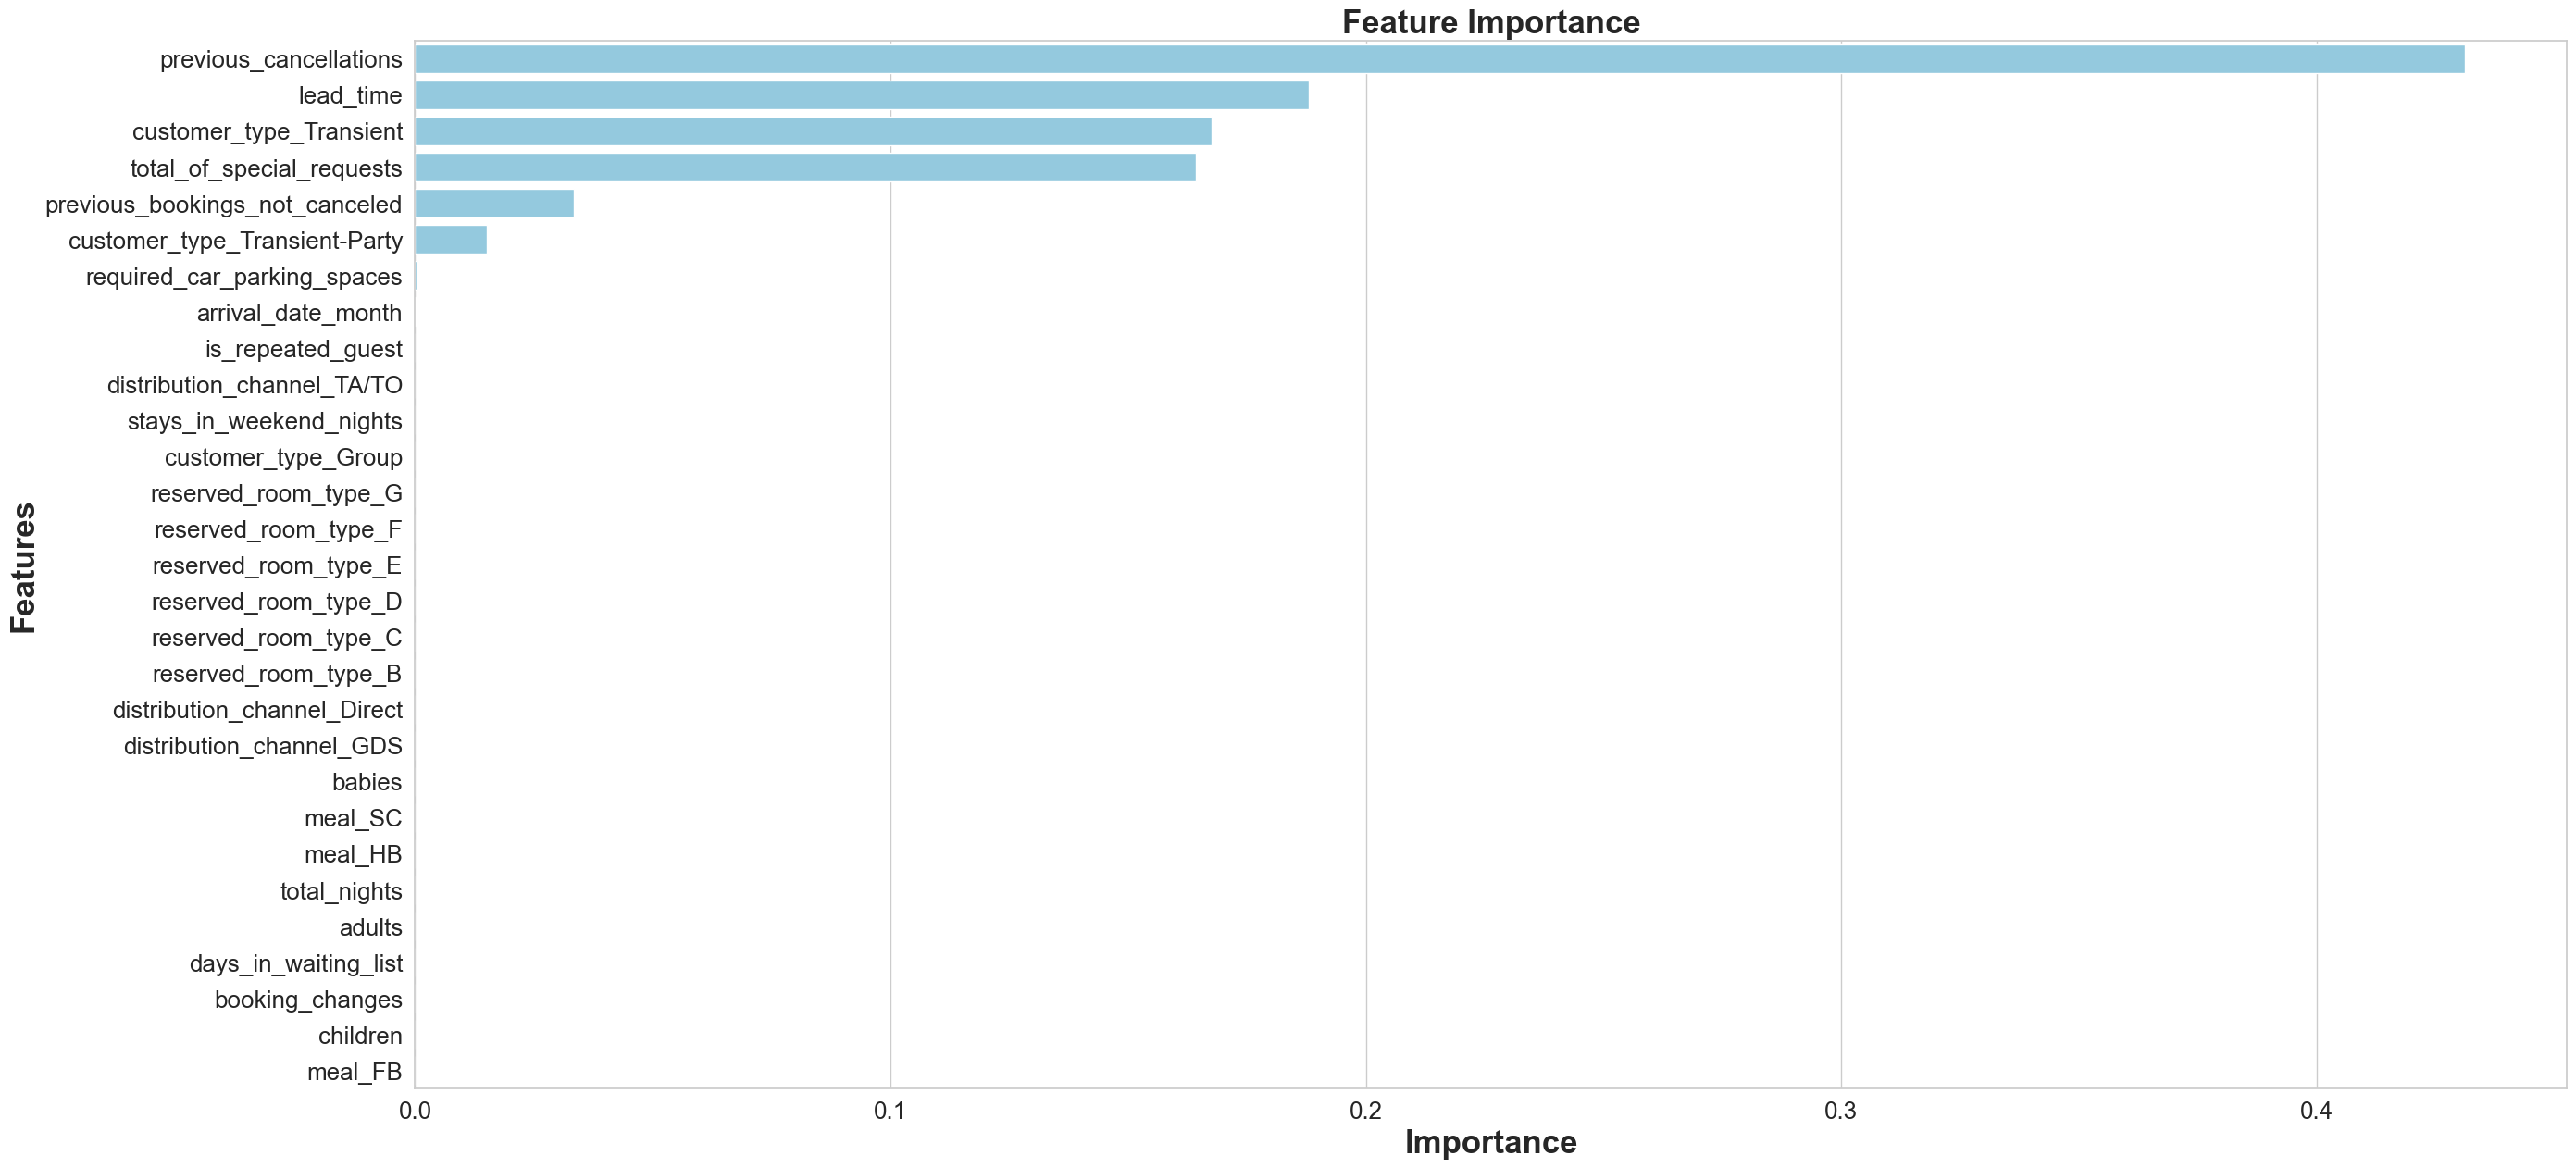

In [55]:
model_decision_tree = DecisionTreeClassifier(random_state=12345, class_weight=None, max_depth=4, min_samples_leaf=8)
model_decision_tree.fit(features_train, target_train)

feats = {}
for feature, importance in zip((df.drop(['is_canceled'], axis=1)).columns, model_decision_tree.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.show()

In [56]:
df = pd.concat([data_train, data_test], ignore_index=False)

feature_config = sv.FeatureConfig(force_cat = ['babies', 'required_car_parking_spaces'])
report_2 = sv.compare_intra(df, df['is_canceled'] == 0, names = ['заказ оплачен', 'заказ отменён'], feat_cfg=feature_config)
#report.show_notebook()
report_2.show_html(filepath='SWEETVIZ_REPORT_2.html')

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT_2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Общий вывод**

Рабочей моделью для предсказания отмены заказа признана модель `"Дерево решений"` без применения балансировки классов и следующими параметрами:

In [57]:
grid_search_decision_tree_disbalance.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, random_state=12345)

`'f1'` модели на кросс-валидации - 0.633, на тесте - 0.617.


Значение прибыли до внедрения модели: `49,10` млн. руб.

Значение прибыли после внедрения модели: `57,54` млн. руб (* без учета возможного падения спроса и налогов)

Портрет потенциально ненадежного клиента:
   
   - наличие ранее отмененных заказов (`'previous_cancellations'`)
   - большое кол-во дней между датой бронирования и датой прибытия (`'lead_time'`)
   - тип заказчика `Transient`(`'customer_type'`)
   - отсутствие специальных отметок в заказе (`'total_of_special_requests'`)
   
   
   - общее кол-во ночей: 2-3 среди недели (`'total_nights'`, `'stays_in_weekend_nights'`)
   - дата прибытия: апрель-июнь (`'arrival_date_month'`)    
